# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\manue\anaconda3\lib\site-packages (0.23.2)


In [2]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\manue\anaconda3\lib\site-packages (1.2.0)


In [3]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\manue\anaconda3\lib\site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [4]:
import pandas as pd

In [5]:
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [6]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [7]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

## Pre-processando o dataset antes do treinamento

In [8]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



In [9]:
# Carregando o simple imputer para substituição de valores nan do dataset
from sklearn.impute import SimpleImputer
import numpy as np

In [10]:
#Definindo simple imputer para os valores categóricos mais frequentes
impute_most = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent',
)

In [11]:
#substituindo os valores nan por zeros nas colunas selecionadas
df_training_dataset[['id', 'modulos_iniciados', 'modulos_finalizados', 'total_modulos']] = df_training_dataset[['id', 'modulos_iniciados', 'modulos_finalizados', 'total_modulos']].fillna(value=0)


In [12]:
#substituindo os valores nan pela média das colunas selecionadas
df_training_dataset[['horas_semanais_estudo', 'certificados']] = df_training_dataset[['horas_semanais_estudo', 'certificados']].fillna(value=df_training_dataset.mean())


In [13]:
# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_most.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_most.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit             0
total_modulos                 0
modulos_iniciados             0
modulos_finalizados           0
certificados                  0
categoria                     0
dtype: int64



In [14]:
#removendo as colunas selecionadas do dataset
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id','universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

In [15]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao', 'graduacao'])
df_training.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_Advogado,...,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário,graduacao_Bacharelado,graduacao_Especialização,graduacao_Licenciatura,graduacao_MBA,graduacao_SEM FORMAÇÃO,graduacao_Tecnólogo
15852,0.0,0.0,1.0,8.0,10.0,0.0,0.0,0.358323,perfil6,0,...,1,0,0,0,1,0,0,0,0,0
15853,0.0,0.0,1.0,7.0,42.0,17.0,15.0,0.358323,perfil5,1,...,0,0,0,0,1,0,0,0,0,0
15854,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.000000,perfil5,0,...,0,0,0,1,0,0,0,0,0,1
15855,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.000000,perfil1,1,...,0,0,0,0,0,0,0,0,1,0
15856,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.000000,perfil1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
from sklearn import preprocessing

## Treinando um classificador com base em Random Forest

### Selecionando FEATURES e definindo a variável TARGET

In [17]:
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'graduacao_Bacharelado',
       'graduacao_Especialização', 'graduacao_Licenciatura', 'graduacao_MBA',
       'graduacao_SEM FORMAÇÃO', 'graduacao_Tecnólogo'],
      dtype='object')

In [18]:
features = df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'graduacao_Bacharelado',
       'graduacao_Especialização', 'graduacao_Licenciatura', 'graduacao_MBA',
       'graduacao_SEM FORMAÇÃO', 'graduacao_Tecnólogo'
    ]
]
target = df_training['categoria']  

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Treinando Random Forest Classifier

In [20]:
# Método para criação de modelos basados em random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [21]:
y_pred = rfc.predict(X_test)
print(y_pred)

['perfil2' 'perfil2' 'perfil4' ... 'perfil1' 'perfil2' 'perfil1']


### Analisando a qualidade do modelo através da matriz de confusão

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

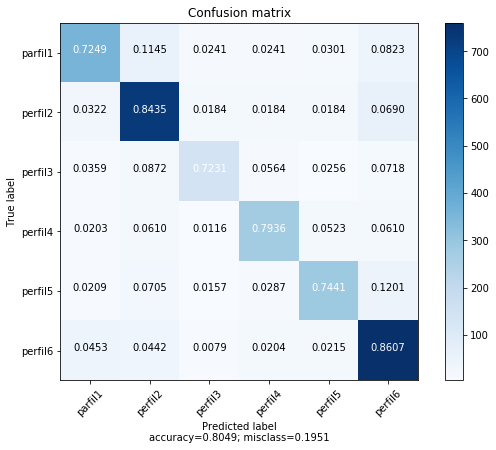

In [23]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>